In [143]:
import os

# Changes the notebook working directory on level up.
%cd ..

# Running main python script.
%run -i "src/main.py"

# Data set from main.py
data_set

/Users/Anne/Documents/UIS/DAT540/Project_Netflix/Project/dat540-netflix_catalogue


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown director,Unknown cast,Unknown country,Unknown date_added,2016,Unknown rating,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [144]:
# Import packages needed for visualization
import datetime as dt
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
#import scipy as sp
import seaborn as sns
from wordcloud import WordCloud

In [162]:
# Split genres into list on comma and put each item on separate line
genres = data_set['listed_in'].dropna().str.split(', ').explode().copy()

Use word cloud to visualize the most frequent genres in the Netflix library

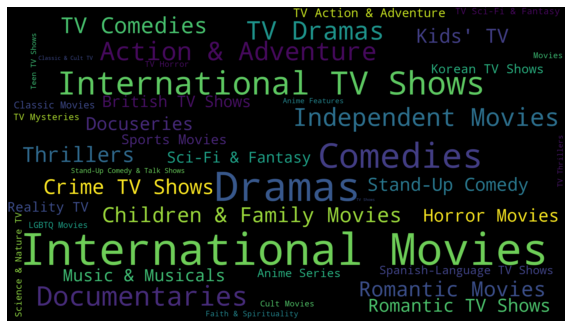

In [146]:
# Make word cloud using frequency of genres.
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate_from_frequencies(genres.value_counts())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Want to plot the genres and total count of each genre. 
Separate into movies and tv shows.
Decided to remove categories International Movies and International TV shows as these were overrepresented in the data set as they are given to all movies not from the US. This category is always coupled with another gerne and is therefore not seen as one of the main genres.

In [163]:
# Extract movie genres
genres_movies = data_set[data_set["type"]=="Movie"]['listed_in'].dropna().str.split(', ').explode().copy()

Text(0.5, 0, 'Total Count')

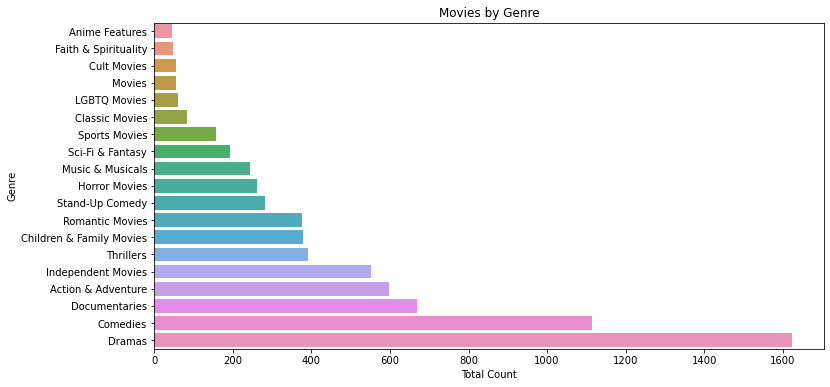

In [148]:
# Plot bar plot of all movie genres
plt.figure(figsize=(12,6))
sns.countplot(y=genres_movies, order=genres_movies.value_counts(ascending=True).index[:-1]) #removed international movies
plt.title("Movies by Genre")
plt.ylabel("Genre")
plt.xlabel("Total Count")

In [164]:
#Extract TV genres
genres_tv = data_set[data_set["type"]=="TV Show"]['listed_in'].dropna().str.split(', ').explode().copy()

Text(0.5, 0, 'Total Count')

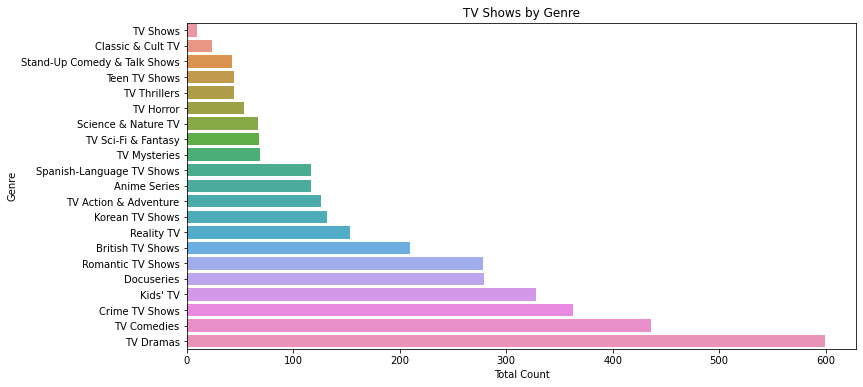

In [150]:
# Plot TV genre count
plt.figure(figsize=(12,6))
sns.countplot(y=genres_tv, order=genres_tv.value_counts(ascending=True).index[:-1]) # Removed international TV shows
plt.title("TV Shows by Genre")
plt.ylabel("Genre")
plt.xlabel("Total Count")

Look at the 5 most frequent movie and TV genres and plot with gear added to see if there are any patterns.
International TV shows and Movies have again been removed. 

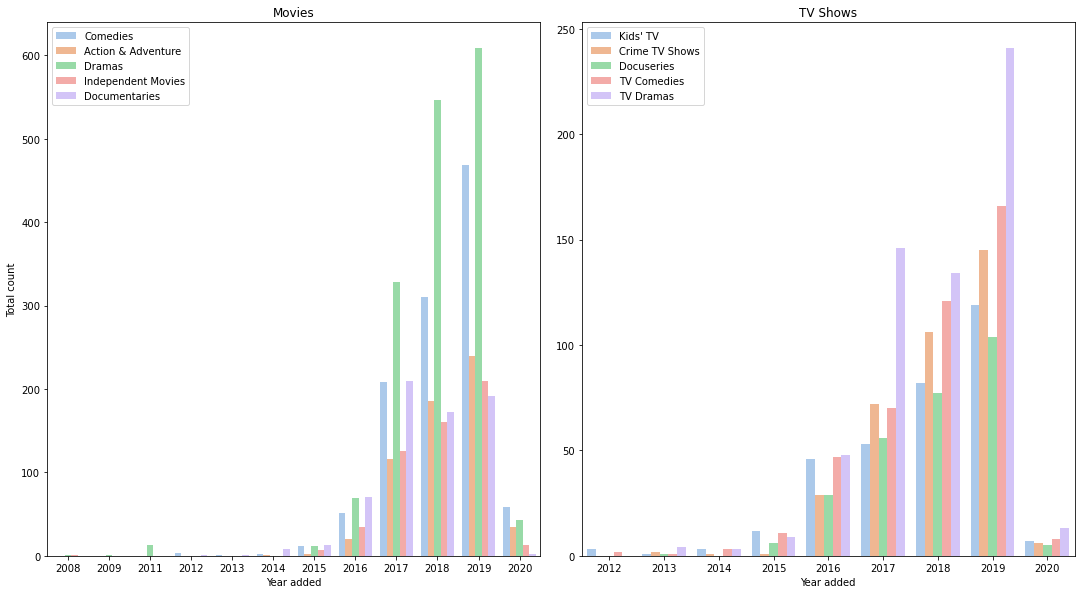

In [165]:
genre_time = data_set[['date_added','listed_in']].copy()
genre_time = genre_time[genre_time['date_added'] != 'Unknown date_added']
genre_time['month_added'] = genre_time['date_added'].str.replace(',', '').str.lstrip().apply(lambda x: dt.datetime.strptime(x,'%B %d %Y')).dt.month_name()
genre_time['year_added'] = genre_time['date_added'].str.replace(',', '').str.lstrip().apply(lambda x: dt.datetime.strptime(x,'%B %d %Y')).dt.year
#year_released = genre_time['date_added']
genre_time['listed_in'] = genre_time['listed_in'].str.split(', ')
genre_time = genre_time.explode('listed_in')
#print(genre_time)

filter_list_m = ['Dramas', 'Comedies', 'Documentaries', 'Action & Adventure', 'Independent Movies']
filter_list_tv = ["TV Dramas", "TV Comedies", "Crime TV Shows", "Kids' TV", "Docuseries"]
top_m_genres = genre_time[genre_time.listed_in.isin(filter_list_m)]
top_tv_genres = genre_time[genre_time.listed_in.isin(filter_list_tv)]


fig, axes = plt.subplots(1, 2, figsize=(15, 8))
#fig.suptitle("Movies TV Shows added to Netflix by Year for top 5 genres")
fig.tight_layout()

sns.countplot(ax=axes[0], x="year_added", hue="listed_in" ,data=top_m_genres, palette="pastel")
axes[0].set_title("Movies")
axes[0].set_xlabel("Year added")
axes[0].set_ylabel("Total count")
axes[0].legend(loc=2)

sns.countplot(ax=axes[1], x="year_added", hue="listed_in" ,data=top_tv_genres, palette="pastel")
axes[1].set_title("TV Shows")
axes[1].set_xlabel("Year added")
axes[1].set_ylabel("")
axes[1].legend(loc=2)


Plot heatplot of genre and year added to Netflix to see if there are any patterns in what genres have been popular over time.

In [152]:
# Create a list of from dataset with month added and genre
year_genre = genre_time[["year_added", "listed_in"]]

# Group month added and genre and make table with value counts
group_y = year_genre.groupby("listed_in")
group_y = group_y['year_added'].value_counts() #count values in month
group_y = group_y.unstack() 
group_y = group_y.fillna(0) #fill nans with 0

# Check table
group_y

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
listed_in,,,,,,,,,,,,,
Action & Adventure,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,20.0,116.0,185.0,239.0,34.0
Anime Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,8.0,14.0,2.0
Anime Series,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,12.0,30.0,56.0,4.0
British TV Shows,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,19.0,51.0,54.0,75.0,2.0
Children & Family Movies,0.0,0.0,0.0,1.0,2.0,2.0,4.0,11.0,21.0,76.0,86.0,151.0,24.0
Classic & Cult TV,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,10.0,5.0,4.0,0.0
Classic Movies,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,16.0,7.0,49.0,9.0
Comedies,0.0,0.0,0.0,0.0,3.0,1.0,2.0,12.0,51.0,208.0,310.0,468.0,58.0
Crime TV Shows,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,29.0,72.0,106.0,145.0,6.0


Text(0.5, 69.0, 'Month added to Netflix')

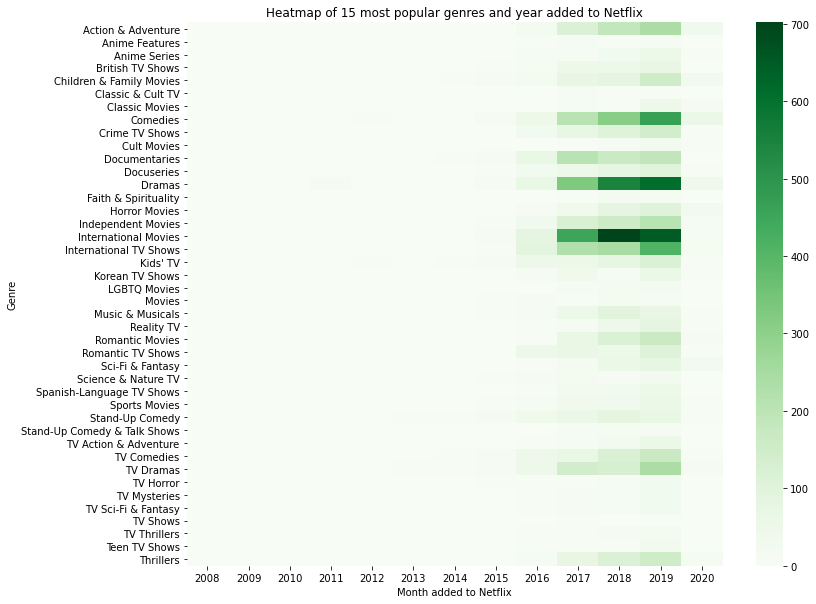

In [153]:
# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(group_y, cmap="Greens")
plt.title("Heatmap of 15 most popular genres and year added to Netflix")
plt.ylabel("Genre")
plt.xlabel("Month added to Netflix")

Heat plot of month added to netflix for 15 most frequent genres. 
Want to check if there is a pattern in when in the year the genres are added to Netflix.

In [154]:
# Create a list of from dataset with year added and genre
month_genre = genre_time[["month_added", "listed_in"]]

# Get most popular genres by value_counts() and only select these from data set
popular_genres = data_set.listed_in.str.split(', ').explode().value_counts().index[:17]
month_genre = month_genre[month_genre.listed_in.isin(popular_genres)]

# Remove International TV shows and International Movies as these are categories that does not give the genre of the movie, only that is was not made in the US. There are overrepresented in the dataset and not that interesting.
month_genre = month_genre[month_genre.listed_in != 'International TV Shows']
month_genre = month_genre[month_genre.listed_in != 'International Movies']

# Group month added and genre and make table with value counts
group = month_genre.groupby("listed_in")
group = group['month_added'].value_counts() #count values in month
group = group.unstack() 
group = group.fillna(0) #fill nans with 0

# Reindex to sort months by calendar and not alphabetically
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
group = group.reindex(columns=months) #sort months according to calendar

# Check table
group

month_added,January,February,March,April,May,June,July,August,September,October,November,December
listed_in,,,,,,,,,,,,
Action & Adventure,68,36,47,33,40,28,42,56,49,62,71,65
Children & Family Movies,54,21,32,23,16,26,25,20,26,47,47,41
Comedies,118,55,110,83,86,59,71,99,71,112,121,128
Crime TV Shows,25,27,36,15,29,28,21,43,36,29,37,36
Documentaries,59,51,62,58,54,48,53,52,53,55,54,69
Docuseries,21,32,27,14,9,12,21,32,33,33,20,24
Dramas,160,111,169,123,105,96,130,114,95,180,153,187
Independent Movies,64,41,56,41,39,39,56,34,39,40,45,58
Kids' TV,40,18,18,21,22,23,29,20,28,40,34,33


Text(0.5, 51.0, 'Month added to Netflix')

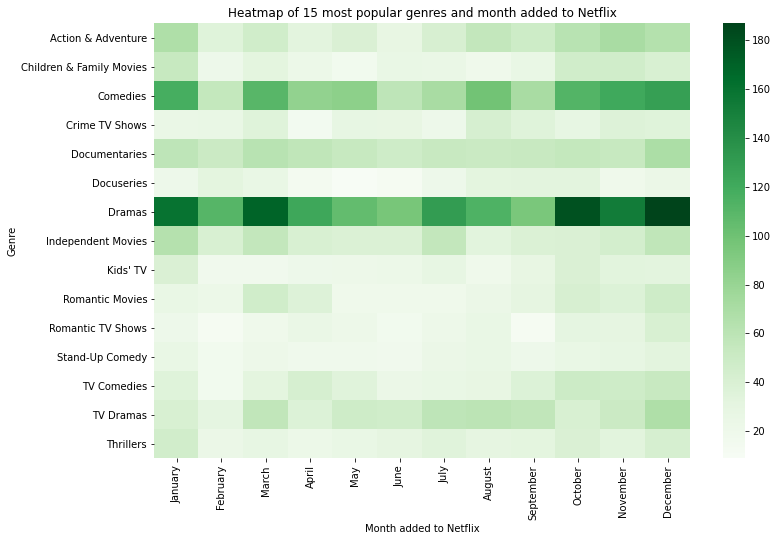

In [155]:
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(group, cmap="Greens")
plt.title("Heatmap of 15 most popular genres and month added to Netflix")
plt.ylabel("Genre")
plt.xlabel("Month added to Netflix")

Check if there has been a change in added international movies and tv shows.

Text(0.5, 0, 'Year')

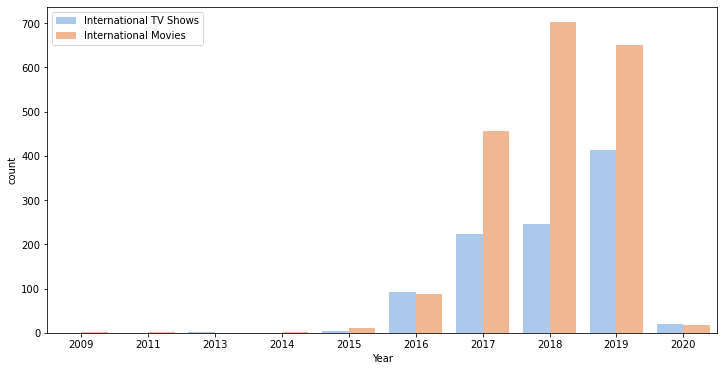

In [156]:
filter_list_int = ["International TV Shows", "International Movies"]
top_int = genre_time[genre_time.listed_in.isin(filter_list_int)]

plt.figure(figsize=(12,6))
sns.countplot(x="year_added", hue="listed_in" ,data=top_int, palette="pastel")
plt.legend(loc=2)
plt.xlabel("Year")

Check most frequent cast in the most frequent movie genres. 

Text(0, 0.5, '')

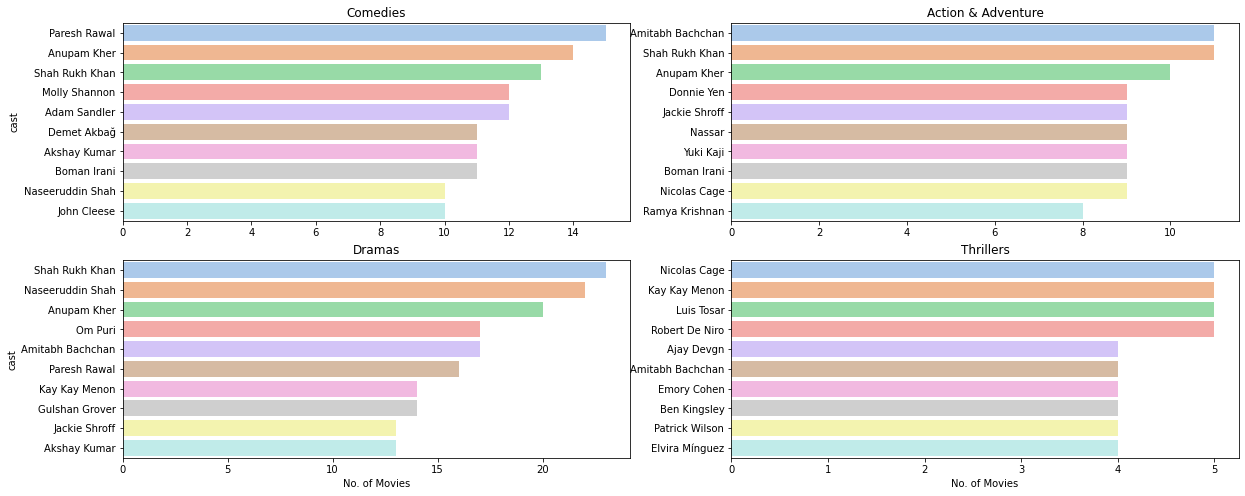

In [166]:
genre_cast = data_set[['cast','listed_in']].copy()
genre_cast = genre_cast[genre_cast['cast'] != 'Unknown cast']
genre_cast['cast'] = genre_cast['cast'].str.split(', ')
genre_cast = genre_cast.explode('cast')

m_per_cast = genre_cast['cast'].value_counts()

genre_cast['listed_in'] = genre_cast['listed_in'].str.split(', ')
genre_cast = genre_cast.explode('listed_in')

top_comedy_cast = genre_cast[genre_cast['listed_in'] == 'Comedies']['cast']

top_action_cast = genre_cast[genre_cast['listed_in'] == 'Action & Adventure']['cast']

top_thriller_cast = genre_cast[genre_cast['listed_in'] == 'Thrillers']['cast']
top_drama_cast = genre_cast[genre_cast['listed_in'] == 'Dramas']['cast']

fig, axes = plt.subplots(2, 2, figsize=(20, 8))
#fig.suptitle("Movies TV Shows added to Netflix by Year for top 5 genres")
#fig.tight_layout()

sns.countplot(ax=axes[0,0], y=top_comedy_cast, palette="pastel", order=top_comedy_cast.value_counts(ascending=False).index[:10])
axes[0,0].set_title("Comedies")
axes[0,0].set_xlabel("")

sns.countplot(ax=axes[0,1], y=top_action_cast, palette="pastel", order=top_action_cast.value_counts(ascending=False).index[:10])
axes[0,1].set_title("Action & Adventure")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")

sns.countplot(ax=axes[1,0], y=top_drama_cast, palette="pastel", order=top_drama_cast.value_counts(ascending=False).index[:10])
axes[1,0].set_title("Dramas")
axes[1,0].set_xlabel("No. of Movies")

sns.countplot(ax=axes[1,1], y=top_thriller_cast, palette="pastel", order=top_thriller_cast.value_counts(ascending=False).index[:10])
axes[1,1].set_title("Thrillers")
axes[1,1].set_xlabel("No. of Movies")
axes[1,1].set_ylabel("")


Check most frequent directors in most frequent movie genres

Text(0, 0.5, '')

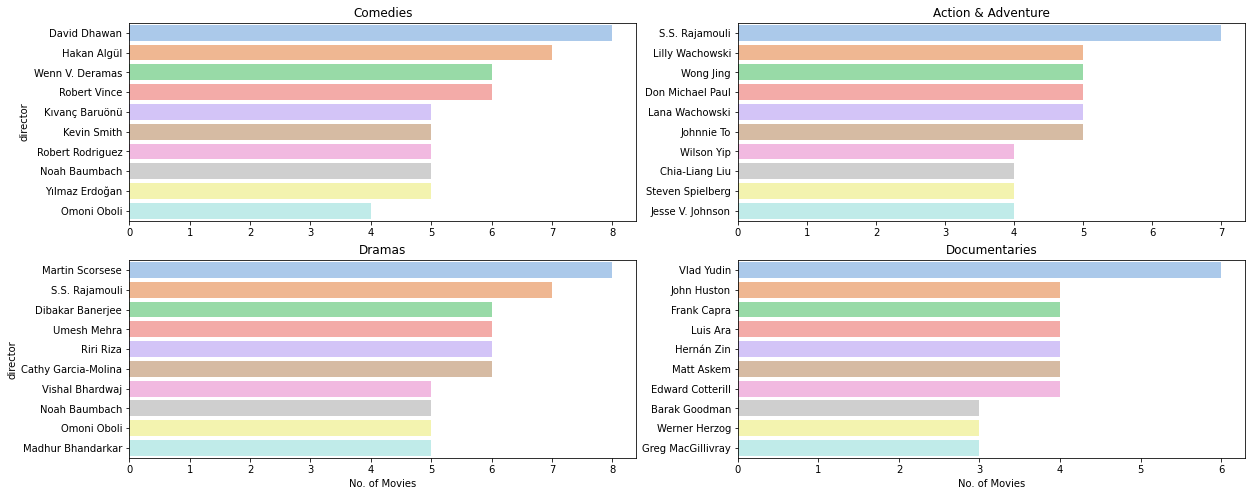

In [167]:
genre_director = data_set[['director','listed_in']].copy()
genre_director = genre_director[genre_director['director'] != 'Unknown director']
genre_director['director'] = genre_director['director'].str.split(',')
genre_director = genre_director.explode('director')
genre_director['director'] = genre_director['director'].str.strip()

m_per_dir = genre_director['director'].value_counts()

genre_director['listed_in'] = genre_director['listed_in'].str.split(',')
genre_director = genre_director.explode('listed_in')
genre_director['listed_in'] = genre_director['listed_in'].str.lstrip()


top_comedy_dir = genre_director[genre_director['listed_in'] == 'Comedies']['director']

top_action_dir = genre_director[genre_director['listed_in'] == 'Action & Adventure']['director']

top_thriller_dir = genre_director[genre_director['listed_in'] == 'Thrillers']['director']
top_doc_dir = genre_director[genre_director['listed_in'] == 'Documentaries']['director']
top_drama_dir = genre_director[genre_director['listed_in'] == 'Dramas']['director']

fig, axes = plt.subplots(2, 2, figsize=(20, 8))
#fig.suptitle("Movies TV Shows added to Netflix by Year for top 5 genres")
#fig.tight_layout()

sns.countplot(ax=axes[0,0], y=top_comedy_dir, palette="pastel", order=top_comedy_dir.value_counts(ascending=False).index[:10])
axes[0,0].set_title("Comedies")
axes[0,0].set_xlabel("")

sns.countplot(ax=axes[0,1], y=top_action_dir, palette="pastel", order=top_action_dir.value_counts(ascending=False).index[:10])
axes[0,1].set_title("Action & Adventure")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")

sns.countplot(ax=axes[1,0], y=top_drama_dir, palette="pastel", order=top_drama_dir.value_counts(ascending=False).index[:10])
axes[1,0].set_title("Dramas")
axes[1,0].set_xlabel("No. of Movies")

sns.countplot(ax=axes[1,1], y=top_doc_dir, palette="pastel", order=top_doc_dir.value_counts(ascending=False).index[:10])
axes[1,1].set_title("Documentaries")
axes[1,1].set_xlabel("No. of Movies")
axes[1,1].set_ylabel("")

In [168]:
data_set.shape

(6234, 12)